*** The Lending Club: Loan default prediction ***

*MLND Capstone Project Notebook*

**II. Analysis **

*Data Exploration*

In this section, you will be expected to analyze the data you are using for the problem. This data can either be in the form of a dataset (or datasets), input data (or input files), or even an environment. The type of data should be thoroughly described and, if possible, have basic statistics and information presented (such as discussion of input features or defining characteristics about the input or environment). Any abnormalities or interesting qualities about the data that may need to be addressed have been identified (such as features that need to be transformed or the possibility of outliers). Questions to ask yourself when writing this section:
- _If a dataset is present for this problem, have you thoroughly discussed certain features about the dataset? Has a data sample been provided to the reader?_
- _If a dataset is present for this problem, are statistics about the dataset calculated and reported? Have any relevant results from this calculation been discussed?_
- _If a dataset is **not** present for this problem, has discussion been made about the input space or input data for your problem?_
- _Are there any abnormalities or characteristics about the input space or dataset that need to be addressed? (categorical variables, missing values, outliers, etc.)_



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sqlite3
import seaborn as sns
from sklearn import tree
%matplotlib inline

In [2]:
def load_loan_data(threshold=1, path='/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/'):
    #df = pd.read_csv('loan.csv', na_values=['NA'], nrows=10000)
    data = pd.read_csv('/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/loan.csv')#, na_values=['NA'])

    t = len(data) / threshold
    data = data.dropna(thresh=t, axis=1) # Drop any column with more than 50% missing values

    return data

#df = load_loan_data(threshold=2)

In [3]:
def filter_data(df, cond):
    # eg df['age']>=50
    df = df[np.where(cond)]
    return df

In [4]:
def show_desc_stats(df):
     # How many null descriptions
     print ("How many null descriptions? {}".format(len(df[df['desc'].isnull()])))

     # Average length of non null descriptions
     print ("Average length of Description Text {}".format(df['desc'].dropna().str.len().mean()))

     sns.distplot(df['desc'].dropna().str.len())

In [381]:
print ("Number of records {}".format(len(df)))
print ("Dataset Shape {}".format(df.shape))

Number of records 887379
Dataset Shape (887379, 74)


In [278]:
numeric_features = df.select_dtypes(include=[np.number])
numeric_features.describe()

/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/numpy/lib/function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,policy_code,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,887379.000,887379.000,887379.000,887379.000,887379.000,887379.000,887379.000,887375.000,887379.000,887350.000,...,887379.000,887379.000,887379.000,887379.000,887234.000,887379.000,887350.000,817103.000,817103.000,817103.000
mean,32465133.055,35001824.816,14755.265,14741.878,14702.464,13.247,436.717,75027.588,18.157,0.314,...,0.397,45.919,4.881,2164.146,0.014,1.000,0.005,225.703,139458.189,32068.620
std,22827341.721,24113354.676,8435.456,8429.898,8442.107,4.382,244.187,64698.300,17.191,0.862,...,4.088,409.694,63.125,4794.783,0.134,0.000,0.078,10311.367,153749.967,37498.258
min,54734.000,70473.000,500.000,500.000,0.000,5.320,15.670,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,1.000,0.000,0.000,0.000,0.000
25%,9206643.000,10877133.500,8000.000,8000.000,8000.000,9.990,260.705,nan,11.910,nan,...,0.000,0.000,0.000,280.170,nan,1.000,nan,nan,nan,nan
50%,34433267.000,37095283.000,13000.000,13000.000,13000.000,12.990,382.550,nan,17.650,nan,...,0.000,0.000,0.000,462.780,nan,1.000,nan,nan,nan,nan
75%,54908135.000,58471347.000,20000.000,20000.000,20000.000,16.200,572.600,nan,23.950,nan,...,0.000,0.000,0.000,831.245,nan,1.000,nan,nan,nan,nan
max,68617057.000,73544841.000,35000.000,35000.000,35000.000,28.990,1445.460,9500000.000,9999.000,39.000,...,358.680,33520.270,7002.190,36475.590,20.000,1.000,14.000,9152545.000,8000078.000,9999999.000


In [279]:
corr = numeric_features.corr()

print (corr['loan_amnt'].sort_values(ascending=False)[:10], '\n')
print (corr['loan_amnt'].sort_values(ascending=False)[-10:])

loan_amnt         1.000
funded_amnt       0.999
funded_amnt_inv   0.997
installment       0.945
out_prncp_inv     0.647
out_prncp         0.647
total_rec_int     0.534
total_pymnt_inv   0.476
total_pymnt       0.475
total_rec_prncp   0.390
Name: loan_amnt, dtype: float64 

collection_recovery_fee       0.052
total_rec_late_fee            0.031
dti                           0.021
acc_now_delinq                0.004
delinq_2yrs                  -0.000
tot_coll_amt                 -0.004
collections_12_mths_ex_med   -0.017
inq_last_6mths               -0.034
pub_rec                      -0.081
policy_code                     nan
Name: loan_amnt, dtype: float64


In [ ]:
categoricals = df.select_dtypes(exclude=[np.number])
categoricals.describe()

In [ ]:
def show_dictionary(path='/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/LCDataDictionary.xlsx'):
    data_dictionary = pd.read_excel(path)

    print(data_dictionary.shape[0])
    print(data_dictionary.columns.tolist())

    data_dictionary.rename(columns={'LoanStatNew': 'name',
                                    'Description': 'description'})
    return data_dictionary

dict = show_dictionary()
dict.head()

*Exploratory Visualization*

In this section, you will need to provide some form of visualization that summarizes or extracts a relevant characteristic or feature about the data. The visualization should adequately support the data being used. Discuss why this visualization was chosen and how it is relevant. Questions to ask yourself when writing this section:
- _Have you visualized a relevant characteristic or feature about the dataset or input data?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_



In [ ]:
df.term.value_counts()

In [ ]:
post_loan_features= ['total_rev_hi_lim','acc_now_delinq','tot_cur_bal']

df[post_loan_features].describe()
df.drop(post_loan_features, axis=1)

Running Data Visualisations

In [ ]:
sns.pairplot(df[['loan_amnt', 'annual_inc', 'emp_length', \
                  'dti', 'grade', 'loan_status']].dropna(), hue='grade')
#plt.set_xticklabels(rotation=30)

In [ ]:
g = sns.factorplot(x="grade", y="loan_amnt", hue="isDefault", order=["A","B","C","D","E","F","G"], data=df, size=6, \
                    kind="violin", split=True, cut=1, aspect=1)

g2 = sns.factorplot(x="purpose", y="loan_amnt", hue="isDefault", data=df, size=6, \
                    kind="violin", split=True, cut=1, aspect=1)
g2.set_xticklabels(rotation=90)

In [ ]:
plt.xticks(rotation=90)

#df_status = df.loc[df['loan_status'].isin(['Current','Charged Off','Default','Fully Paid','In Grace Period','Late (16-30 days)','Late (31-120 days)'])]

sns.countplot(df['loan_status'], palette='Set2')
plt.xlabel('Loan Status')

In [ ]:
sns.distplot(df['loan_amnt'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

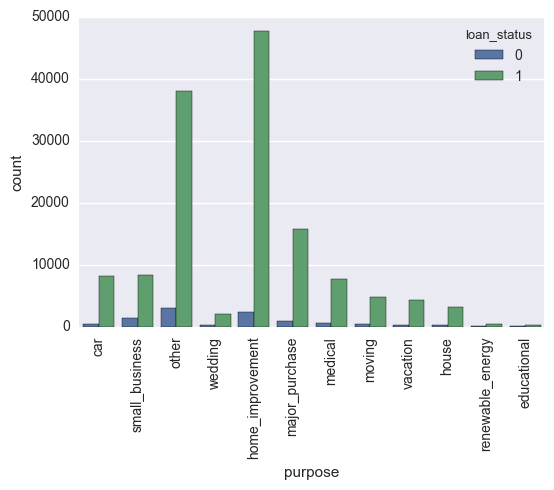

In [294]:
df_sub = df[df.purpose.isin(['debt_consolidation', 'credit_card']) == False]
sns.countplot(x="purpose", hue="loan_status", data=df_sub)
plt.xticks(rotation=90)

In [ ]:
df[df.purpose.isin(['debt_consolidation', 'credit_card']) == False].groupby(by=['loan_status','purpose']).count()['id']

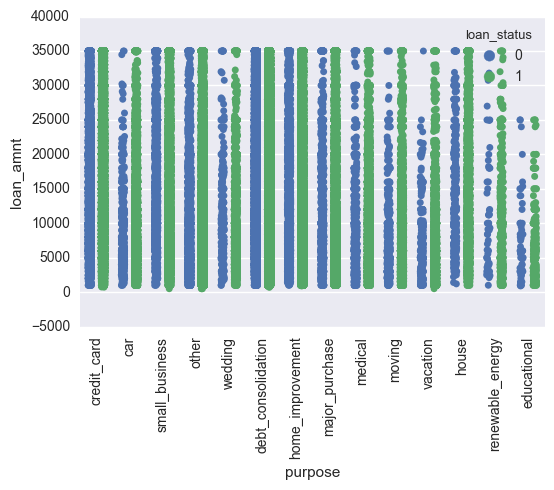

In [293]:
plt.xticks(rotation=90)
sns.stripplot(data=df[['loan_status','loan_amnt', 'purpose']], x='purpose', y='loan_amnt', \
              jitter=True, hue='loan_status', split=True)

In [ ]:
#p1 = sns.violinplot(data=df[['loan_status', 'int_rate', 'grade', 'loan_amnt']], hue='loan_status', x='grade', \
#               order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], y='loan_amnt', split=True, inner='quartile')
mapping_dict = {'loan_status':{1:'Fully Paid', 0:'Default'}}
df = df.replace(mapping_dict)

p2 = sns.violinplot(data=df[['loan_status', 'int_rate', 'grade']], hue='loan_status', x='grade', \
               order=['A', 'B', 'C', 'D', 'E', 'F', 'G'], y='int_rate', split=True, inner='quartile')

plt.xticks(rotation=0)

In [ ]:
plot_df = df.query('loan_amnt > 10 & int_rate <28')[:3000]

sns.set(font_scale=1.2, rc={"lines.linewidth": 1.5}) 

g = sns.lmplot("int_rate", "loan_amnt", x_jitter= .7,  y_jitter= .1,
           data=plot_df, hue='term',lowess=True, size=5,aspect=1.4, legend_out=False,
           scatter_kws={ 's':20, 'alpha':.6})

g.set(xlim=(2.5, 28),ylim=(580, 880),alpha = .5)

#g.savefig('1.png',transparent=True)

# Data Preprocessing

** Cleaning abnomalies **

Converting data format and type for some features:

Employment Length

In [5]:
def print_data_shape(df):
    print ("No rows: {}".format(df.shape[0]))
    print ("No cols: {}".format(df.shape[1]))
    print (df.head(1).values)
    print ("Columns: " + df.columns)

#print_data_shape(df)

In [6]:
def proc_emp_length():
    df.replace('n/a', np.nan, inplace=True)
    df.emp_length.fillna(value=0, inplace=True)
    df['emp_length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)
    df['emp_length'] = df['emp_length'].astype(int)
    #df.emp_length.head()

#proc_emp_length()
#print_data_shape(df)

interest rate

Revolving Utility

In [ ]:
df.revol_bal.head()
#df.revol_util = pd.Series(df.revol_util).str.replace('%', '').astype(float)

Emloyment Title

In [ ]:
print (df.emp_title.value_counts().head())
print (df.emp_title.value_counts().tail())
df.emp_title.unique().shape

Verified Income

In [ ]:
df.verification_status.value_counts()

Issue Date

In [7]:
def proc_issue_d():
    df['issue_month'], df['issue_year'] = zip(*df.issue_d.str.split('-'))
    df.drop(['issue_d'], 1, inplace=True)

#proc_issue_d()

Zip Code

In [8]:
def proc_zip_code():
    df['zip_code'] = df['zip_code'].str.rstrip('x')

#proc_zip_code()

Purpose

In [ ]:
print (df.purpose.value_counts())
print ('')
print (df.title.value_counts().head())

Drop attributes populated post loan completion

In [ ]:
print_data_shape(df)

In [9]:
def drop_attrs(df, inc_ids=True):
    # Drop post loan attributes
    try:
        df.drop(['out_prncp','out_prncp_inv','total_pymnt',
                 'total_pymnt_inv', 'total_rec_prncp'], 1 , inplace=True)
        # Drop surrogate identifiers
        if inc_ids:
            df.drop(['id','member_id'], 1, inplace=True)
        # Dropping last few cols with too many nulls
        df.drop(['next_pymnt_d','total_rev_hi_lim','tot_coll_amt','tot_cur_bal','emp_title','last_pymnt_d', \
             'title','collections_12_mths_ex_med','last_credit_pull_d', 'total_acc', 'pub_rec', \
             'policy_code','pymnt_plan','earliest_cr_line'], 1, inplace=True)
        # drop text columns
        df.drop(['url'], 1, inplace=True)
        # drop last few records with nulls
        #df = df.dropna()
    except:
        print("Could not drop columns")

#drop_attrs(df, inc_ids=True)

Look at correlation and eliminate highly correlated attributes

In [ ]:
cor = df.corr()
cor.loc[:,:] = np.tril(cor, k=-1) # below main lower triangle of an array
cor = cor.stack()
cor[(cor > 0.55) | (cor < -0.55)]

In [ ]:
plt.subplots(figsize=(12, 9))
cor = df.corr()
# Draw the heatmap using seaborn
sns.heatmap(cor, vmax=.8, square=True)

Create Binary Classifier

In [10]:
def proc_loan_status(df):
    mapping_dict = {'loan_status':{'Fully Paid':0, 'Charged Off': 1, 'Default': 1, 'Current': 0}}
    df = df.replace(mapping_dict)
    df = df[(df['loan_status'] == 1) | (df['loan_status'] == 0)]
    return df

#df = proc_loan_status(df)

#print_data_shape(df)
#df.loan_status.value_counts()

Handle Missing values

Policy Code, Public Record

In [ ]:
df.policy_code.value_counts()
df.pub_rec.value_counts()
df.pymnt_plan.value_counts()

In [11]:
def show_nulls(df):
    nulls = pd.DataFrame(df.isnull().sum().sort_values(ascending=False)[:25])
    nulls.columns = ['Null Count']   
    nulls.index.name = 'Feature'
    return nulls

#show_nulls(df)

In [389]:
df.dropna(how='any', axis=1, inplace=True)
#show_nulls(df)

#print_data_shape(df)

AttributeError: 'NoneType' object has no attribute 'dropna'

In [390]:
df

Show dataset

In [ ]:
df.ix[:5,:10]

In [ ]:
df.ix[:5,11:20]

In [ ]:
df.ix[:5,31:40]

In [ ]:
df.ix[:5,51:60]

Prepare Data: One hot encode, Scaling, normalise

In [ ]:
df.columns

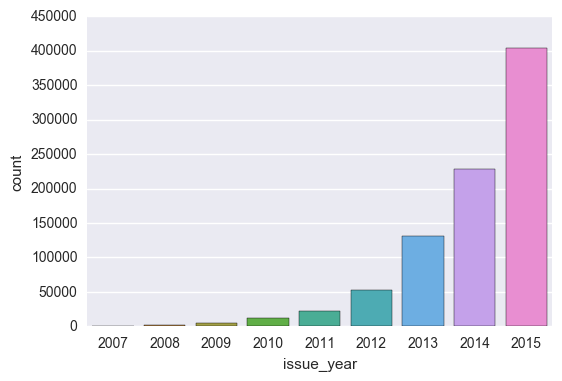

In [290]:
#df = filter_data(df, 'df.issue_year == \'2014\'')
#len(df[df['issue_year'] == '2012'])
sns.countplot(data=df, x='issue_year')

In [28]:
def run_preproc(df):
    print ("processing emp_length")
    proc_emp_length()
    print ("processing issue_d")
    proc_issue_d()
    print ("processing zip_code")
    proc_zip_code()
    # print ("dropping cols")
    #df = drop_attrs(df)
    
    df.drop(['out_prncp','out_prncp_inv','total_pymnt',
             'total_pymnt_inv', 'total_rec_prncp'], 1 , inplace=True)
    # Drop surrogate identifiers
    df.drop(['id','member_id'], 1, inplace=True)
    # Dropping last few cols with too many nulls
    df.drop(['next_pymnt_d','total_rev_hi_lim','tot_coll_amt','tot_cur_bal','emp_title','last_pymnt_d', \
             'title','collections_12_mths_ex_med','last_credit_pull_d', 'total_acc', 'pub_rec', 'initial_list_status', \
             'policy_code','pymnt_plan','earliest_cr_line'], 1, inplace=True)
    # drop text columns
    df.drop(['url'], 1, inplace=True)
    # drop last few records with nulls
    df = df.dropna()

    print ("processing loan_status")
    df = proc_loan_status(df)
    return df

df = load_loan_data(threshold=2)

df = run_preproc(df)
show_nulls(df)

/Users/sergeboo/Software/anaconda3/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2821: DtypeWarning: Columns (19,55) have mixed types. Specify dtype option on import or set low_memory=False.
  if self.run_code(code, result):


processing emp_length
processing issue_d
processing zip_code
processing loan_status


,Null Count
Feature,
issue_year,0
zip_code,0
funded_amnt,0
funded_amnt_inv,0
term,0
int_rate,0
installment,0
grade,0
sub_grade,0


In [401]:
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,revol_util,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,application_type,acc_now_delinq,issue_month,issue_year
0,5000.000,5000.000,4975.000,36 months,10.650,162.870,B,B2,10,RENT,...,83.700,861.070,0.000,0.000,0.000,171.620,INDIVIDUAL,0.000,Dec,2011
1,2500.000,2500.000,2500.000,60 months,15.270,59.830,C,C4,1,RENT,...,9.400,435.170,0.000,117.080,1.110,119.660,INDIVIDUAL,0.000,Dec,2011
2,2400.000,2400.000,2400.000,36 months,15.960,84.330,C,C5,10,RENT,...,98.500,603.650,0.000,0.000,0.000,649.910,INDIVIDUAL,0.000,Dec,2011
3,10000.000,10000.000,10000.000,36 months,13.490,339.310,C,C1,10,RENT,...,21.000,2209.330,16.970,0.000,0.000,357.480,INDIVIDUAL,0.000,Dec,2011
4,3000.000,3000.000,3000.000,60 months,12.690,67.790,B,B5,1,RENT,...,53.900,1009.070,0.000,0.000,0.000,67.790,INDIVIDUAL,0.000,Dec,2011


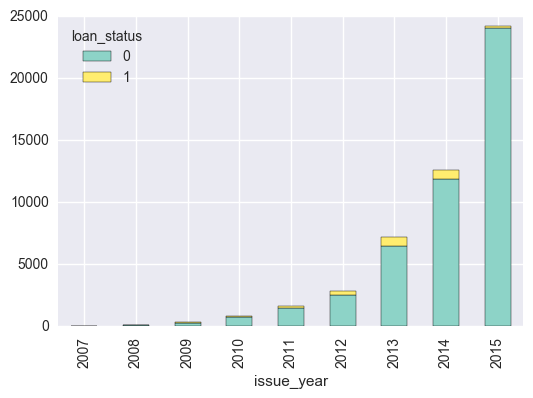

In [13]:
# data viz
pd.set_option('display.float_format', lambda x: '%.3f' % x)
grp = df.groupby(by=['issue_year','loan_status']).count()['loan_amnt'] #.plot(kind='bar', stacked=True)

# re-map loan status to categorical feature
mapping_dict = {'loan_status':{0:'Fully Paid', 1: 'Default'}}
df2 = df.replace(mapping_dict)

df2 = df[df['purpose']=='home_improvement']

# Visualise Loan Default Percentage / ratio per year
grp_df = df2.groupby(['issue_year','loan_status']).count().unstack()
#tempdf['percent']=tempdf[0]/tempdf['total']*100
grp_df['loan_amnt'].plot(kind='bar', stacked=True, colormap='Set3')

In [152]:
df.purpose.value_counts()

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64

In [31]:
# Taking a sample dataset
filtered_loans = df[df['issue_year'].isin(['2014', '2015'])]
filtered_loans = filtered_loans[filtered_loans['purpose']=='small_business']

In [549]:
# One off test
#filtered_loans.drop(['zip_code','url'], 1, inplace=True)
#filtered_loans.drop(['id','member_id'], 1, inplace=True)

One hot encoding of categorical features

In [32]:
cat_columns = ['home_ownership', 'verification_status', 'purpose', 'term', \
               'grade', 'sub_grade', 'issue_month', \
               'issue_year', 'application_type', 'addr_state'] 

def one_hot_encode(df, cat_cols):
    # addr_state
    dummy_df = pd.get_dummies(df[cat_cols])
    df = pd.concat([df, dummy_df], axis=1)
    df = df.drop(cat_cols, axis=1)
    
    return df

filtered_loans = one_hot_encode(filtered_loans, cat_columns)
filtered_loans.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,emp_length,annual_inc,loan_status,zip_code,dti,...,addr_state_SD,addr_state_TN,addr_state_TX,addr_state_UT,addr_state_VA,addr_state_VT,addr_state_WA,addr_state_WI,addr_state_WV,addr_state_WY
230952,9000.000,9000.000,9000.000,12.990,303.210,6,50000.000,0,902,37.250,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
231031,3000.000,3000.000,3000.000,16.490,106.200,2,30000.000,0,560,35.520,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
231076,28000.000,28000.000,28000.000,8.190,879.880,10,275000.000,0,402,12.430,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
231113,25000.000,25000.000,25000.000,15.590,873.880,9,82500.000,0,925,7.330,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
231334,18625.000,18625.000,18625.000,15.990,654.710,3,52000.000,1,193,20.470,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000


In [33]:
# Show loan status distribution
filtered_loans['loan_status'].value_counts() / filtered_loans.shape[0]

0   0.943
1   0.057
Name: loan_status, dtype: float64

In [526]:
print_data_shape(filtered_loans)

No rows: 10005
No cols: 132
[[2000.0 2000.0 2000.0 15.99 70.31 7 37000.0 0 '852' 16.19 2.0 1.0 9.0
  4533.0 20.1 275.21 0.0 0.0 0.0 70.31 0.0 0.0 0.0 1.0 1.0 0.0 0.0 1.0 1.0
  0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 1.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]]
Index(['Columns: loan_amnt', 'Columns: funded_amnt',
       'Columns: funded_amnt_inv', 'Columns: int_rate', 'Columns: installment',
       'Columns: emp_length', 'Columns: annual_inc', 'Columns: loan_status',
       'Columns: zip_code', 'Columns: dti',
       ...
       'Columns: addr_state_SD', 'Columns: addr_state_TN',
       'Columns: addr_state_TX', 'Columns: addr_state_UT',
       'Columns: 

Test: drop state_addr field

*Algorithms and Techniques*

In this section, you will need to discuss the algorithms and techniques you intend to use for solving the problem. You should justify the use of each one based on the characteristics of the problem and the problem domain. Questions to ask yourself when writing this section:
- _Are the algorithms you will use, including any default variables/parameters in the project clearly defined?_
- _Are the techniques to be used thoroughly discussed and justified?_
- _Is it made clear how the input data or datasets will be handled by the algorithms and techniques chosen?_



In [34]:
def save_preproc_dataset(df, sub=None):
    #filtered_loans = df.sample(100000, random_state=42)
    df.to_csv('/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/filtered_loans.csv', index=False)

save_preproc_dataset(filtered_loans)

def open_preproc_dataset():
    df = pd.read_csv('/Users/sergeboo/Projects/machine-learning/kaggle/lending-club/filtered_loans.csv')
    return df

In [135]:
from time import time

def compute_metrics(classifier, predictions):
    
    predictions = pd.Series(predictions)
    # False positives
    fp_filter = (predictions == 1) & (filtered_loans['loan_status'] == 0)
    fp = len(predictions[fp_filter])
    
    # True positives
    tp_filter = (predictions == 1) & (filtered_loans['loan_status'] == 1)
    tp = len(predictions[tp_filter])
    
    # False negatives
    fn_filter = (predictions == 0) & (filtered_loans['loan_status'] == 1)
    fn = len(predictions[fn_filter])
    
    # True negatives
    tn_filter = (predictions == 0)& (filtered_loans['loan_status'] == 0)
    tn = len(predictions[tn_filter])
    
    # Rates
    '''print("tp {}".format(tp))
    print("tn {}".format(tn))
    print("fn {}".format(fn))
    print("fp {}".format(fp))'''

    try:
        tpr = tp / (tp + fn)
    except ZeroDivisionError:
        tpr = 0
        
    try:
        fpr = fp / (fp + tn)
    except ZeroDivisionError:
        fpr = 0    
    
    print(tpr * 100)
    print(fpr * 100)
    #print()
    
    print('All Measurements:')
    
    try:
        sp = tn / (tn + fp)
    except ZeroDivisionError:
        sp = 0

    try:
        sty = tp / (tp + fn)
    except ZeroDivisionError:
        sty = 0

    try:
        prcn = tp / (tp + fp)
        npv = tn / (fn + tn)
    except ZeroDivisionError:
        prcn = 0
        npv = 0

    G_mean = np.sqrt(sp * sty)
    acc = (tn + tp) / features.shape[0]
    
    method_dict = { 'classifier': '{}'.format(classifier),
                    'specificity': '{:.2f}'.format(sp*100), 
                    'sensitivity': '{:.2f}'.format(sty*100), 
                    'G-mean': '{:.2f}'.format(G_mean*100),
                    'precision': '{:.2f}'.format(prcn*100), 
                    'Negative Predictive Value': '{:.2f}'.format(npv*100), 
                    'accuracy': '{:.2f}'.format(acc*100),
                    'False Positive Rate': '{:.2f}'.format(fpr*100)
                 }
    return pd.DataFrame(method_dict, index=['values'])

In [136]:
filtered_loans = open_preproc_dataset()
filtered_loans.ix[:5,21:30]

,home_ownership_MORTGAGE,home_ownership_OWN,home_ownership_RENT,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,purpose_small_business,term_ 36 months,term_ 60 months
0,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000
1,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000
2,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,0.000
3,0.000,0.000,1.000,0.000,1.000,0.000,1.000,1.000,0.000
4,0.000,0.000,1.000,0.000,0.000,1.000,1.000,1.000,0.000
5,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000


In [137]:
# split dataset: feature and target columns
x_cols = filtered_loans.columns
features_cols = x_cols.drop(['loan_status']) # Dropping target field
features = filtered_loans[features_cols]
target = filtered_loans['loan_status'].values

In [138]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor, AdaBoostClassifier

from sklearn.svm import SVC

from sklearn.cross_validation import cross_val_predict, KFold
from sklearn.utils import shuffle

scaler = StandardScaler()

In [139]:
#from sklearn.model_selection import train_test_split
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
                                    features, target, random_state=1, test_size=.25)

#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

In [140]:
from collections import Counter
Counter(y_train)
#X_train.head()

Counter({0: 3722, 1: 230})

Grid Search CV to optimise parameters

In [45]:
from sklearn.pipeline import make_pipeline
from sklearn.grid_search import GridSearchCV

In [46]:
penalty = {
    0: 1,
    1: 11
}

pipe = make_pipeline(LogisticRegression(class_weight=penalty))
C_range = 10.**np.arange(-2, 3)
penalty_options = ['l1','l2']
param_grid = {'logisticregression__C': C_range, 'logisticregression__penalty': penalty_options}
grid = GridSearchCV(pipe, param_grid, cv=10, scoring='roc_auc')
grid.fit(features, target)
grid.best_score_

0.92451187778976407

In [48]:
grid.best_params_   # Print best parameters for the logistic model

{'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1'}

Create a Generic Classifier Function

In [141]:
def run_classifier(clf, X, y, penalty=None, random=1):
    start_time = time()
    kf = KFold(X.shape[0], random_state=random, shuffle=False)

    predictions = cross_val_predict(clf, X, y, cv=kf) 

    # Let's compute performance:
    metrics = compute_metrics(clf.__class__.__name__, predictions)
    duration = int(round((time() - start_time) * 1000))
    return metrics, duration

#print ("Elapsed: {%H %M %S %Z}".format(elapsed))

Running a Prediction Pipeline

In [146]:
from IPython.display import display, HTML

penalty = { 0: 1,
            1: 11 }

LR = LogisticRegression(C=0.01, class_weight=penalty)
DT = DecisionTreeClassifier(random_state=1, class_weight=penalty)
RFR = RandomForestRegressor(n_estimators=100, random_state=1) #.fit(features,target)
RFC = RandomForestClassifier(n_estimators=100, random_state=1, class_weight=penalty) #.fit(features,target)
#clf = RandomForestClassifier(n_estimators=100, bootstrap=True, min_samples_leaf=5, max_depth=20, 
#                             max_features=10, class_weight='balanced')
ADA = AdaBoostClassifier(n_estimators=200, learning_rate=0.7)
svc = SVC(C=0.01, random_state=1, class_weight=penalty)

classifiers = [DT, LR, RFR, RFC, ADA, svc]

results = pd.DataFrame()

for clf in classifiers:
    print ("Running Classifier {}".format(clf.__class__.__name__))
    metrics, elapsed = run_classifier(clf=clf, X=features, y=target.tolist(), penalty=penalty, random=1)
    results.append(metrics)
    display(metrics)

display(results)

Running Classifier DecisionTreeClassifier
46.179401993355484
8.412155363252163
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,8.41,65.03,96.56,88.99,DecisionTreeClassifier,24.96,46.18,91.59


Running Classifier LogisticRegression
51.162790697674424
10.907627289192996
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,10.91,67.51,96.79,86.93,LogisticRegression,22.13,51.16,89.09


Running Classifier RandomForestRegressor
54.2713567839196
0.0
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,0.00,73.67,96.53,50.09,RandomForestRegressor,100.00,54.27,100.00


Running Classifier RandomForestClassifier
36.21262458471761
0.0
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,0.00,60.18,96.28,96.36,RandomForestClassifier,100.00,36.21,100.00


Running Classifier AdaBoostClassifier
40.863787375415285
7.546790098611391
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,7.55,61.47,96.27,89.51,AdaBoostClassifier,24.70,40.86,92.45


Running Classifier SVC
0.0
0.0
All Measurements:


,False Positive Rate,G-mean,Negative Predictive Value,accuracy,classifier,precision,sensitivity,specificity
values,0.00,0.00,0.00,94.29,SVC,0.00,0.00,100.00


""


In [147]:
results

""


ROC Curve analysis

In [158]:
from sklearn import metrics
import pandas as pd

clf = LogisticRegression()
clf.fit(X_train, y_train)

preds = clf.predict_proba(X_test)[:,1]
fpr, tpr, _ = metrics.roc_curve(y_test, preds)
auc = metrics.auc(fpr,tpr)

df = pd.DataFrame(dict(fpr=fpr, tpr=tpr))

n_classes = target.shape[1]

from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt

fpr, tpr = roc_curve(classes, scores)
plt.plot(fpr, tpr)

IndexError: tuple index out of range

In [ ]:
from sklearn.metrics import roc_curve, auc

n_classes = target.shape[1]

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# plot curve
plt.figure()
lw = 2
plt.plot(fpr[2], tpr[2], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

SVM: Optimise parameters

In [ ]:
from sklearn.metrics import classification_report

penalty = {
    0: 1,
    1: 11
}

tuned_parameters = [{'kernel': ['rbf'], 'gamma': [1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]},
                    {'kernel': ['linear'], 'C': [1, 10, 100, 1000]}]

scores = ['precision', 'recall']

for score in scores:
    print("# Tuning hyper-parameters for %s" % score)
    print()

    clf = GridSearchCV(lr(C=1), tuned_parameters, cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print()
    print(clf.best_params_)
    print()
    print("Grid scores on development set:")
    print()
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    print()

    print("Detailed classification report:")
    print()
    print("The model is trained on the full development set.")
    print("The scores are computed on the full evaluation set.")
    print()
    y_true, y_pred = y_test, clf.predict(X_test)
    print(classification_report(y_true, y_pred))
    print()

Feature Importance

(0.0, 0.5)

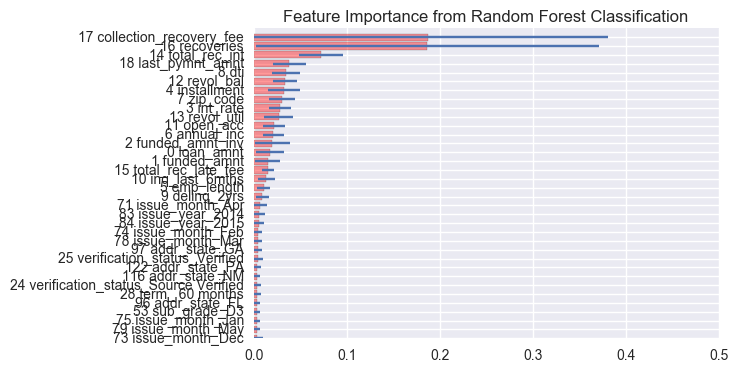

In [104]:
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

RF = RandomForestRegressor(n_estimators=100, random_state=1).fit(features,target)

feature_names = np.array([' '.join([str(b), a]) for a,b in zip(features.columns,range(len(features.columns)))])

importance = np.mean([tree.feature_importances_ for tree in RF.estimators_],axis=0)
std = np.std([tree.feature_importances_ for tree in RF.estimators_],axis=0)
indices = np.argsort(importance)
range_ = range(len(importance))
plt.figure()
plt.title("Feature Importance from Random Forest Classification")

plt.barh(range_, importance[indices], color="r", xerr=std[indices], alpha=0.4, align="center")

plt.yticks(range(len(importance)), feature_names[indices])
plt.ylim([100, len(importance)])
#plt.ylim([100, 135])
plt.xlim([0.0, 0.5])

*Benchmark*

In this section, you will need to provide a clearly defined benchmark result or threshold for comparing across performances obtained by your solution. The reasoning behind the benchmark (in the case where it is not an established result) should be discussed. Questions to ask yourself when writing this section:
- _Has some result or value been provided that acts as a benchmark for measuring performance?_
- _Is it clear how this result or value was obtained (whether by data or by hypothesis)?_


**III. Methodology**

*Data Preprocessing*

In this section, all of your preprocessing steps will need to be clearly documented, if any were necessary. From the previous section, any of the abnormalities or characteristics that you identified about the dataset will be addressed and corrected here. Questions to ask yourself when writing this section:
- _If the algorithms chosen require preprocessing steps like feature selection or feature transformations, have they been properly documented?_
- _Based on the **Data Exploration** section, if there were abnormalities or characteristics that needed to be addressed, have they been properly corrected?_
- _If no preprocessing is needed, has it been made clear why?_


*Implementation*

In this section, the process for which metrics, algorithms, and techniques that you implemented for the given data will need to be clearly documented. It should be abundantly clear how the implementation was carried out, and discussion should be made regarding any complications that occurred during this process. Questions to ask yourself when writing this section:
- _Is it made clear how the algorithms and techniques were implemented with the given datasets or input data?_
- _Were there any complications with the original metrics or techniques that required changing prior to acquiring a solution?_
- _Was there any part of the coding process (e.g., writing complicated functions) that should be documented?_



*Refinement*

In this section, you will need to discuss the process of improvement you made upon the algorithms and techniques you used in your implementation. For example, adjusting parameters for certain models to acquire improved solutions would fall under the refinement category. Your initial and final solutions should be reported, as well as any significant intermediate results as necessary. Questions to ask yourself when writing this section:
- _Has an initial solution been found and clearly reported?_
- _Is the process of improvement clearly documented, such as what techniques were used?_
- _Are intermediate and final solutions clearly reported as the process is improved?_



** IV. Results **

*Model Evaluation and Validation*

In this section, the final model and any supporting qualities should be evaluated in detail. It should be clear how the final model was derived and why this model was chosen. In addition, some type of analysis should be used to validate the robustness of this model and its solution, such as manipulating the input data or environment to see how the model’s solution is affected (this is called sensitivity analysis). Questions to ask yourself when writing this section:
- _Is the final model reasonable and aligning with solution expectations? Are the final parameters of the model appropriate?_
- _Has the final model been tested with various inputs to evaluate whether the model generalizes well to unseen data?_
- _Is the model robust enough for the problem? Do small perturbations (changes) in training data or the input space greatly affect the results?_
- _Can results found from the model be trusted?_


*Justification*

In this section, your model’s final solution and its results should be compared to the benchmark you established earlier in the project using some type of statistical analysis. You should also justify whether these results and the solution are significant enough to have solved the problem posed in the project. Questions to ask yourself when writing this section:
- _Are the final results found stronger than the benchmark result reported earlier?_
- _Have you thoroughly analyzed and discussed the final solution?_
- _Is the final solution significant enough to have solved the problem?_

**V. Conclusion**

Free-Form Visualization
In this section, you will need to provide some form of visualization that emphasizes an important quality about the project. It is much more free-form, but should reasonably support a significant result or characteristic about the problem that you want to discuss. Questions to ask yourself when writing this section:
- _Have you visualized a relevant or important quality about the problem, dataset, input data, or results?_
- _Is the visualization thoroughly analyzed and discussed?_
- _If a plot is provided, are the axes, title, and datum clearly defined?_
